# WordStream

>- The importance of a word is represented by its font size and opacity.   
>- In this study, the importance of a word is its **`Sudden attention`**: a word which appear repeatedly throughout the timeline conveys less and less meaning than in its first appearance.  
> - https://github.com/iDataVisualizationLab/WordStream

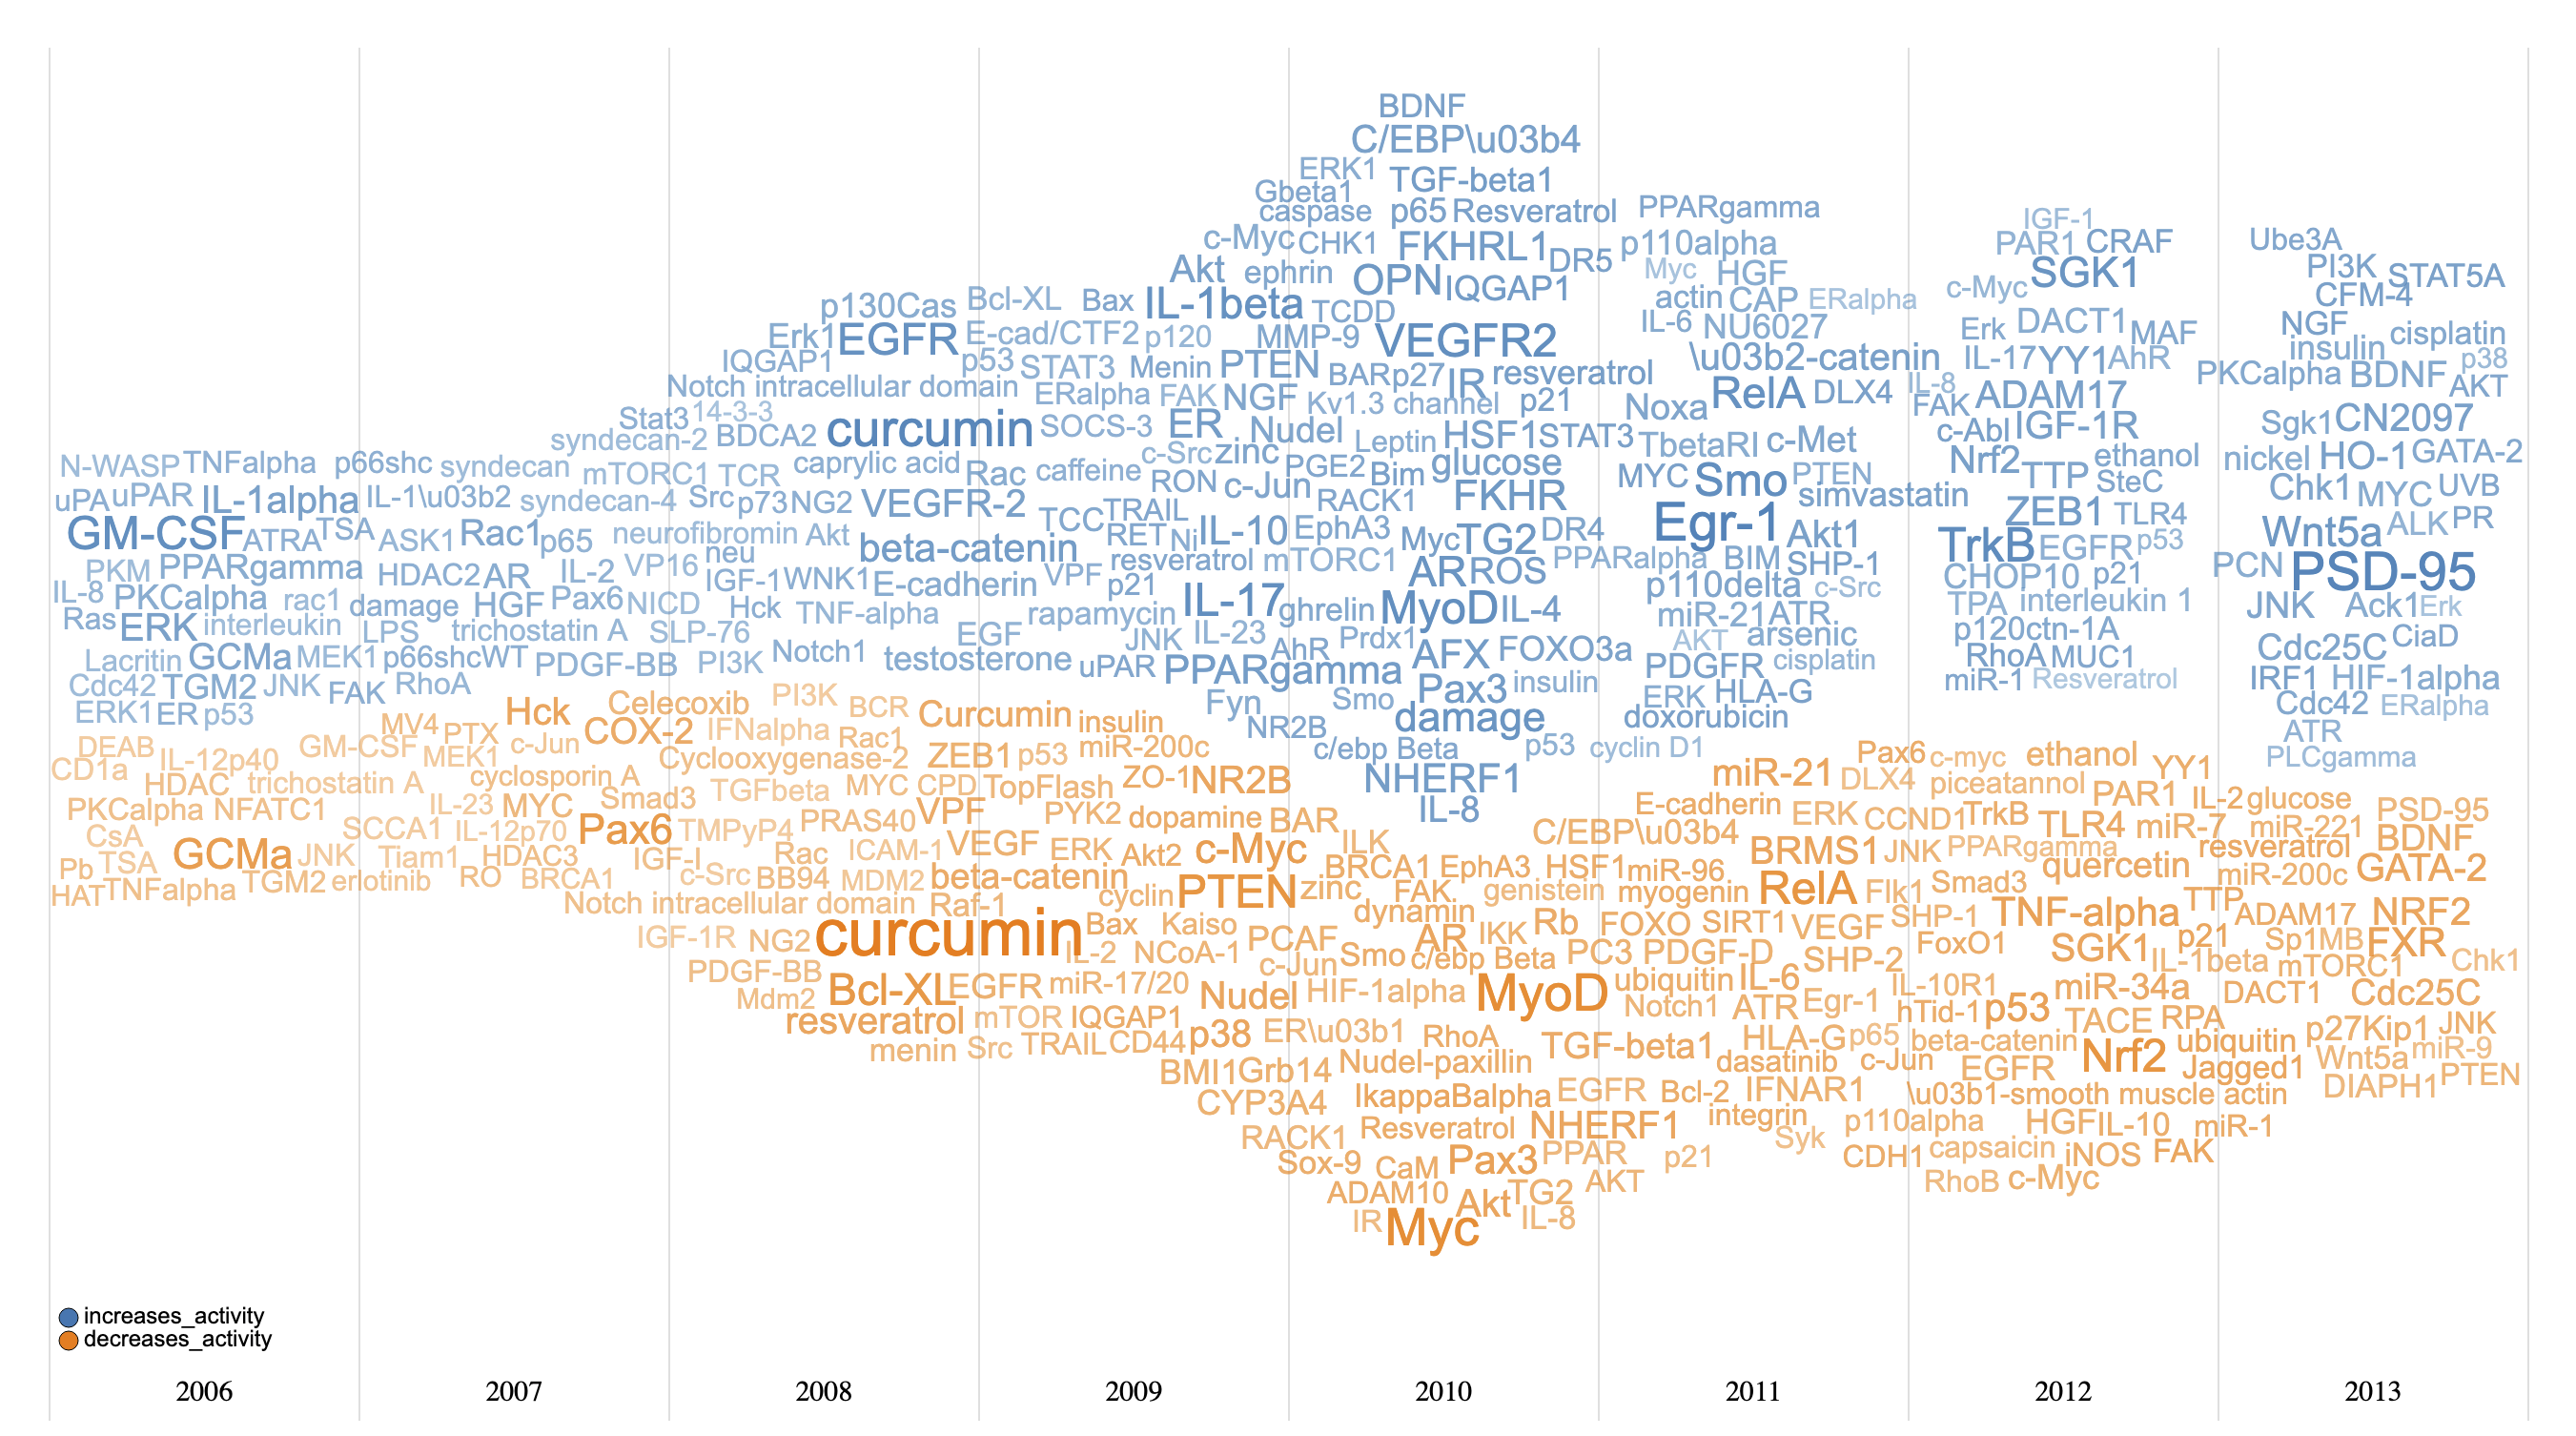
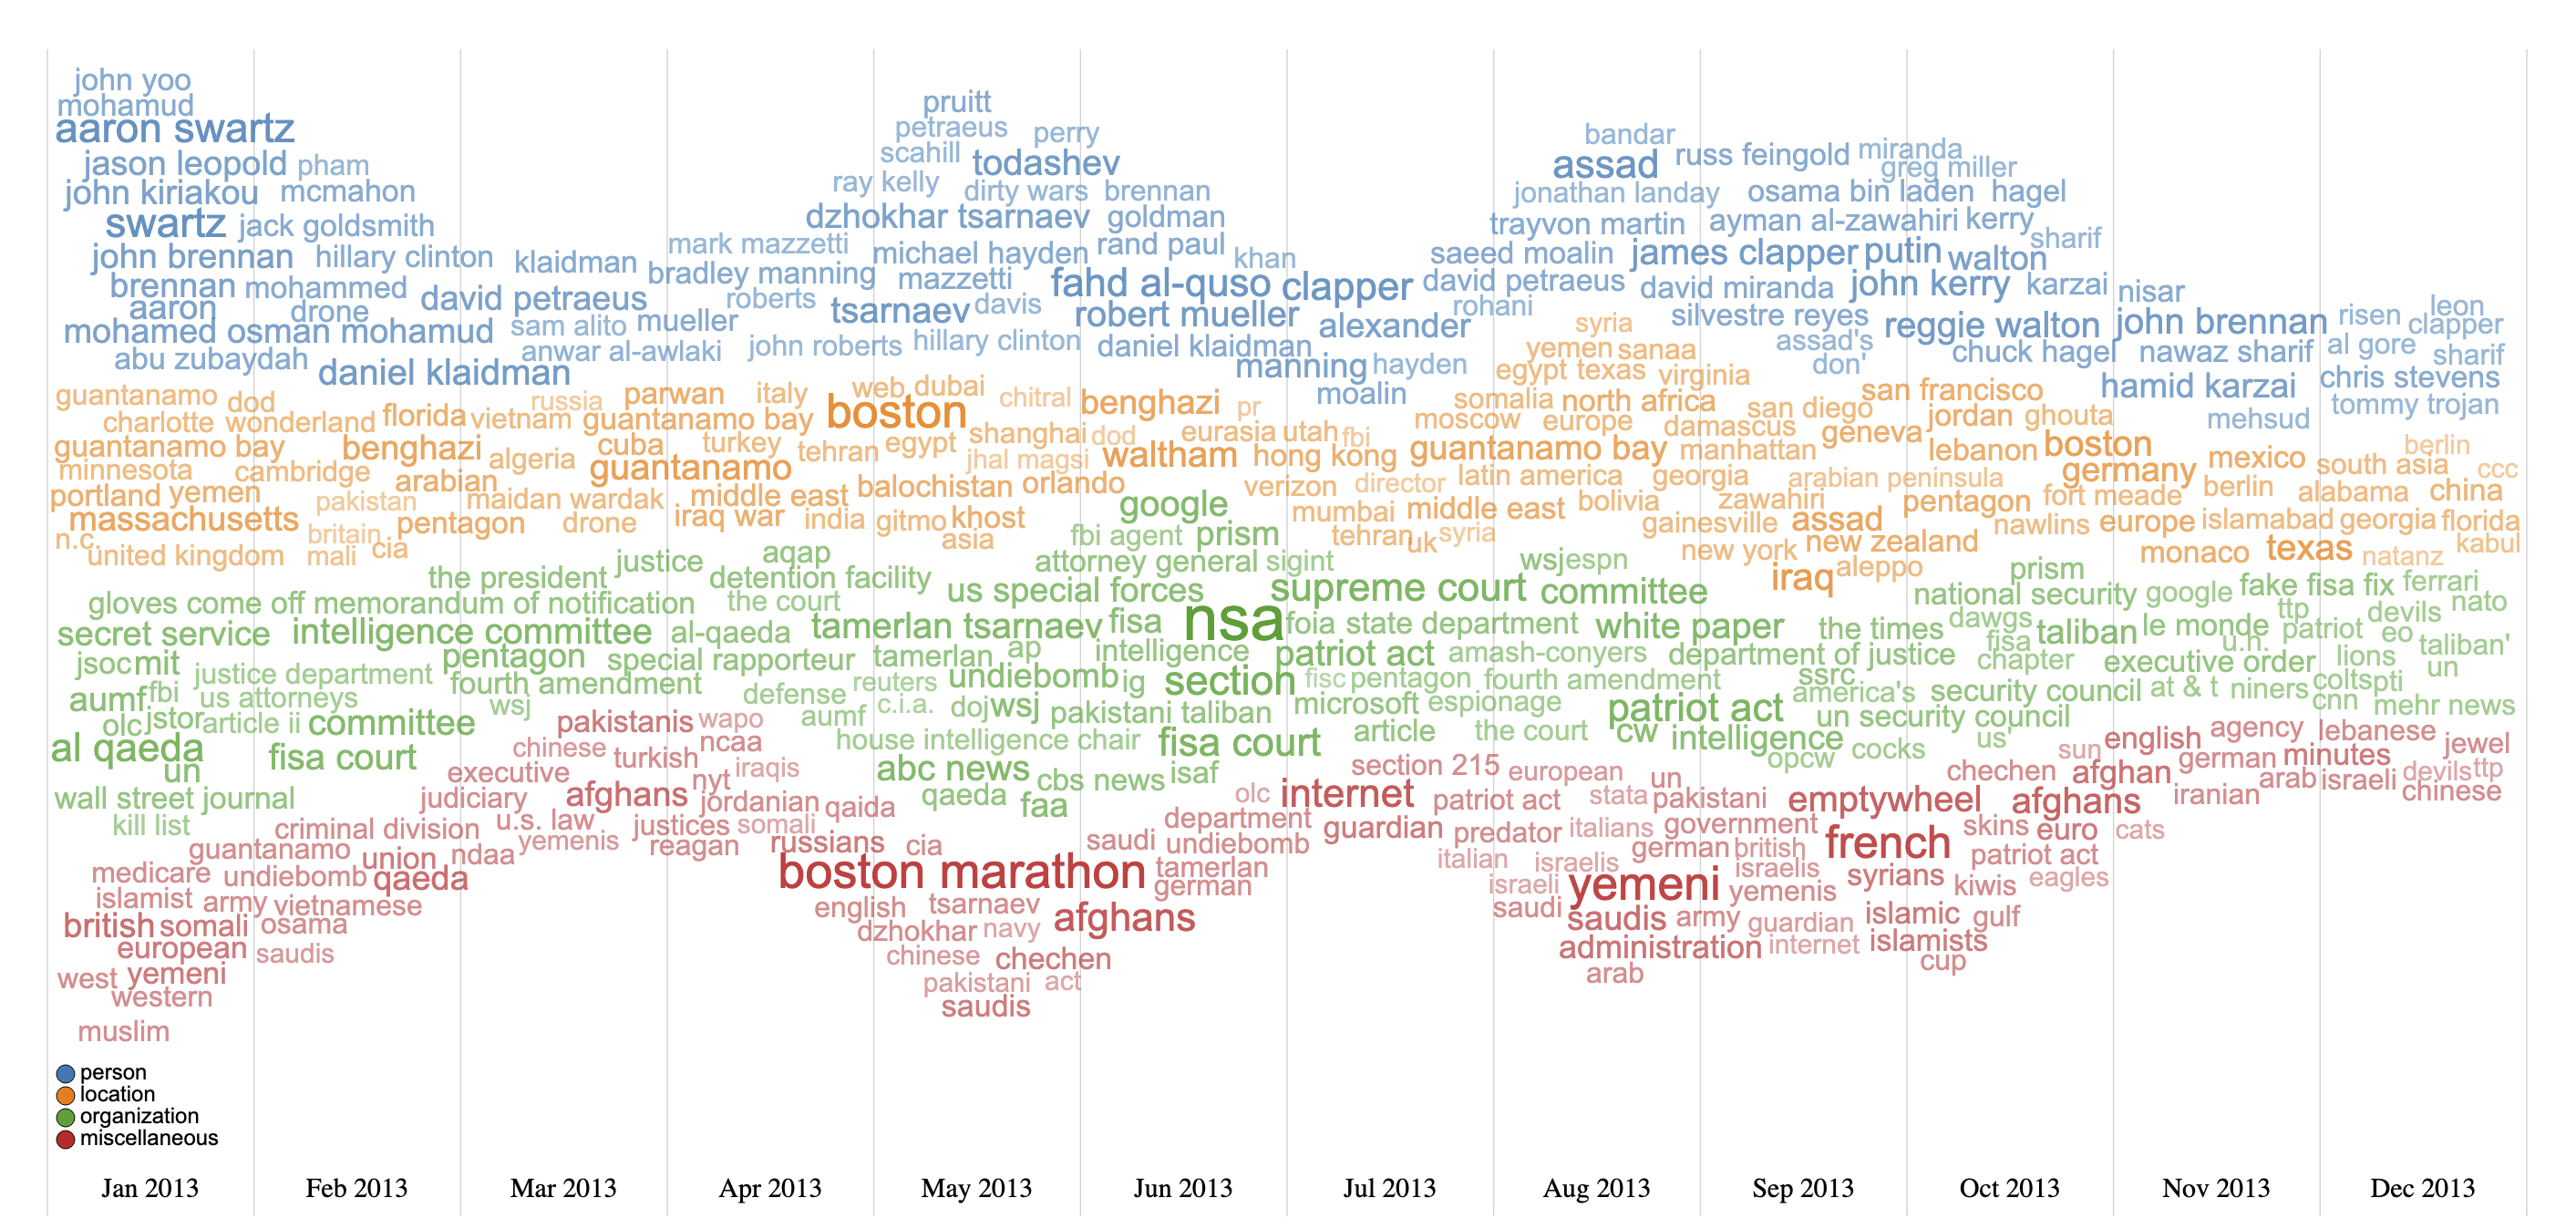  

> 출처: https://idatavisualizationlab.github.io/WordStream/examples.html

---

> **Wordstream 구현 웹사이트 'WordStream Maker'**  
>> - **`문제점: 긍부정 NER/구분 구현 불가`:**  
>> - time column: 10년치 데이터, text column: 기사 제목 각각 입력 시 사이트만으로는 긍부정은 따로 구분 불가  
>> - https://huyen-nguyen.github.io/maker/index.html#wordstream  

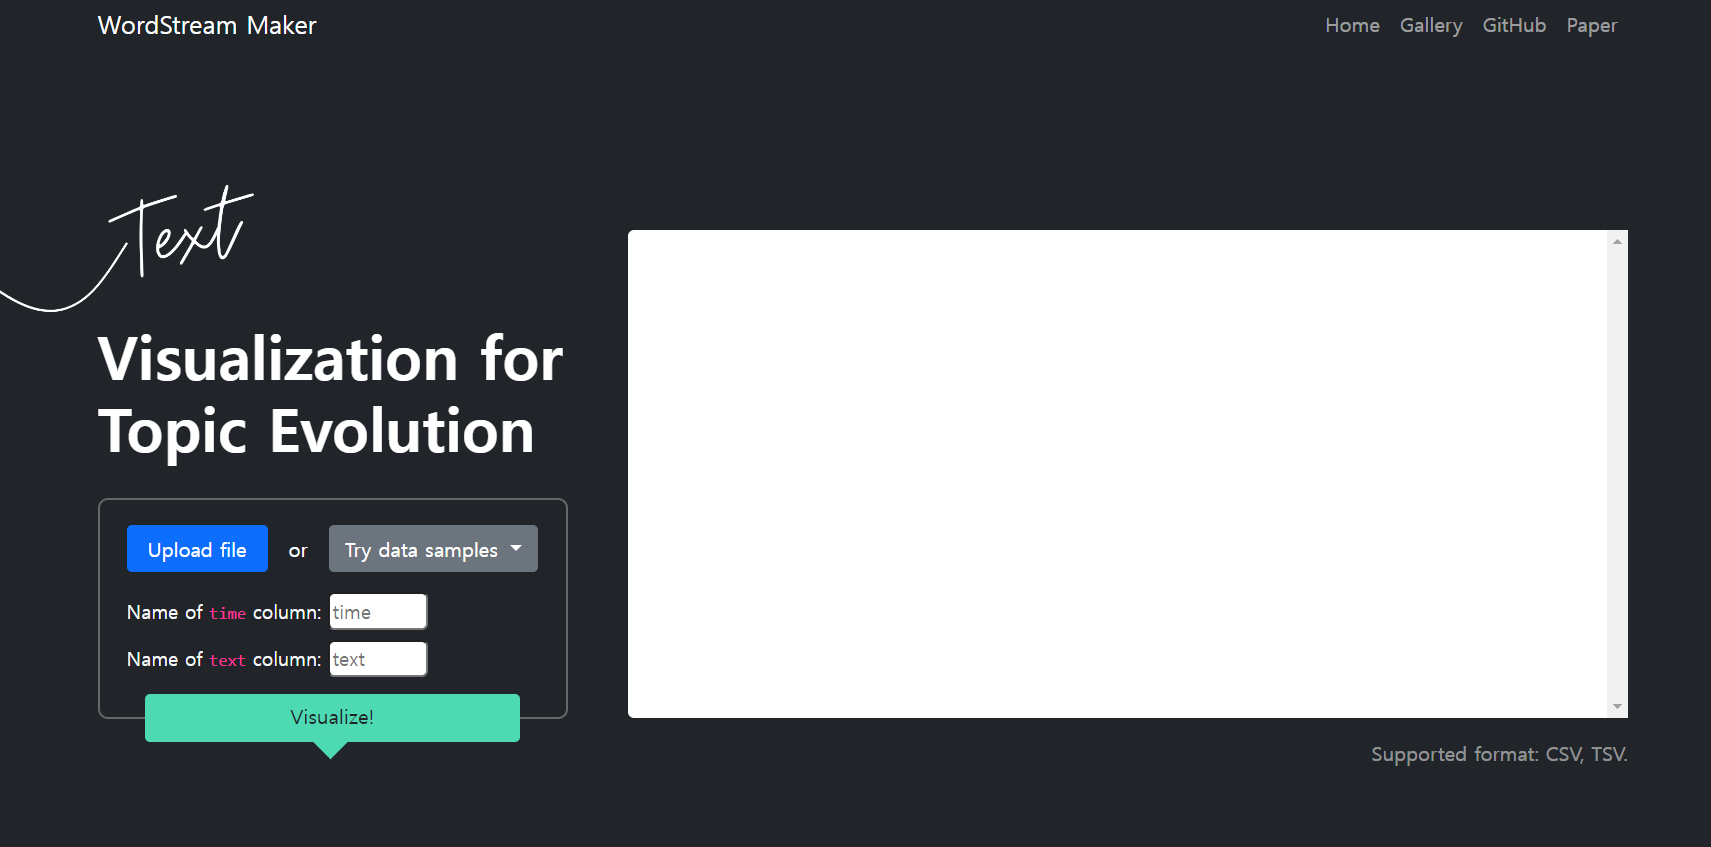 
<center> 'WordStream Maker 웹사이트' </center> 



---

# Bokeh를 통한 WordStream

- sudden attention 및 frequency 기반 워드스트림 구현 가능, 토픽 수 맞춤화 가능
- html과 파이썬만으로 구현

> 참고: https://github.com/BernyWeiss/VIS2_WordStream

- 사용 시각화 라이브러리: bokeh(Anaconda사)  
>**`보케(bokeh)`**: **자바스크립트 없이 파이썬만으로** 인터랙티브한 시각화를 가능하게 만든 파이썬 라이브러리!

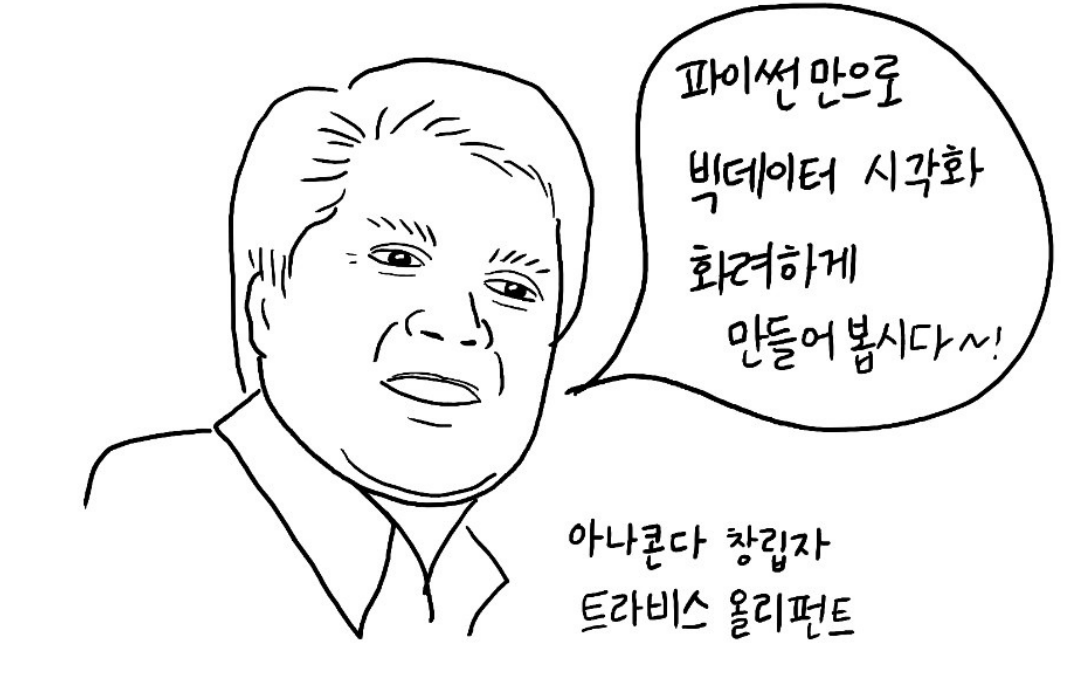
출처: https://brunch.co.kr/@hvnpoet/128 

---

# 생략

In [28]:
import pandas as pd
df = pd.read_csv(r'D:\Analysis\DEBA\NLP\Sentiment_Analysis\data\df_news_sentiment.csv')

In [29]:
df

,일자,제목,부정확률,긍정확률,긍부정
0,20171231.0,"""지루할 틈 없이 보내야지"" 인도로, 일터로, 꿈 찾는 6070",0.078647,0.919130,1.0
1,20171231.0,"박상기 ""중요범죄 수사 인권옹호 위해 수사권 조정 추진""",0.610862,0.387715,0.0
2,20171231.0,"[신년사] 박상기 법무장관 ""내년도 법무부 탈검찰화 지속""",0.107809,0.890017,1.0
3,20171231.0,"[2018 한경 신춘문예 ] 시나리오 부문 김대명 씨, ""작품과 함께한 2년 너무 ...",0.070866,0.921518,1.0
4,20171231.0,[김기자의 현장+] 묵묵히 일하는 당신이 '2018년 주인공',0.076930,0.919367,1.0
...,...,...,...,...,...
65529,NaN,NaN,NaN,NaN,NaN
65530,NaN,NaN,NaN,NaN,NaN
65531,NaN,NaN,NaN,NaN,NaN
65532,NaN,NaN,NaN,NaN,NaN


In [30]:
df = df.dropna()

In [31]:
df

,일자,제목,부정확률,긍정확률,긍부정
0,20171231.0,"""지루할 틈 없이 보내야지"" 인도로, 일터로, 꿈 찾는 6070",0.078647,0.919130,1.0
1,20171231.0,"박상기 ""중요범죄 수사 인권옹호 위해 수사권 조정 추진""",0.610862,0.387715,0.0
2,20171231.0,"[신년사] 박상기 법무장관 ""내년도 법무부 탈검찰화 지속""",0.107809,0.890017,1.0
3,20171231.0,"[2018 한경 신춘문예 ] 시나리오 부문 김대명 씨, ""작품과 함께한 2년 너무 ...",0.070866,0.921518,1.0
4,20171231.0,[김기자의 현장+] 묵묵히 일하는 당신이 '2018년 주인공',0.076930,0.919367,1.0
...,...,...,...,...,...
12734,20130101.0,"감리회 태화복지재단, 기독교사회복지 10개 기관에 3년간 3000만원씩 지원",0.151954,0.843564,1.0
12735,20130101.0,[새 시대 새 대통령] 국민행복시대 국민에게 듣는다,0.079038,0.915989,1.0
12736,20130101.0,[신년 기획 - 왜 사회적 경제인가]“내 건강부터 챙기려 찾았던 의료생협 서로 위로...,0.077761,0.918274,1.0
12737,20130101.0,[우정이야기]노후요양비 걱정 덜어줄 국영보험,0.184584,0.819728,1.0


In [32]:
df['일자'] = df['일자'].astype(int)

C:\Users\KDB\AppData\Local\Temp\ipykernel_15236\1714405380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일자'] = df['일자'].astype(int)


In [33]:
df['긍부정'] = df['긍부정'].astype(int)

C:\Users\KDB\AppData\Local\Temp\ipykernel_15236\2083364338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['긍부정'] = df['긍부정'].astype(int)


In [34]:
df['Sentiment_Label'] = df['긍부정'].apply(lambda x: 'Positive' if x == 1 else 'Negative')

C:\Users\KDB\AppData\Local\Temp\ipykernel_15236\2287151092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_Label'] = df['긍부정'].apply(lambda x: 'Positive' if x == 1 else 'Negative')


In [35]:
df = df.drop(columns=['부정확률', '긍정확률', '긍부정'])

In [36]:
df

,일자,제목,Sentiment_Label
0,20171231,"""지루할 틈 없이 보내야지"" 인도로, 일터로, 꿈 찾는 6070",Positive
1,20171231,"박상기 ""중요범죄 수사 인권옹호 위해 수사권 조정 추진""",Negative
2,20171231,"[신년사] 박상기 법무장관 ""내년도 법무부 탈검찰화 지속""",Positive
3,20171231,"[2018 한경 신춘문예 ] 시나리오 부문 김대명 씨, ""작품과 함께한 2년 너무 ...",Positive
4,20171231,[김기자의 현장+] 묵묵히 일하는 당신이 '2018년 주인공',Positive
...,...,...,...
12734,20130101,"감리회 태화복지재단, 기독교사회복지 10개 기관에 3년간 3000만원씩 지원",Positive
12735,20130101,[새 시대 새 대통령] 국민행복시대 국민에게 듣는다,Positive
12736,20130101,[신년 기획 - 왜 사회적 경제인가]“내 건강부터 챙기려 찾았던 의료생협 서로 위로...,Positive
12737,20130101,[우정이야기]노후요양비 걱정 덜어줄 국영보험,Positive


In [41]:
df.to_csv("df_news.csv", encoding='utf-8-sig', index=False)

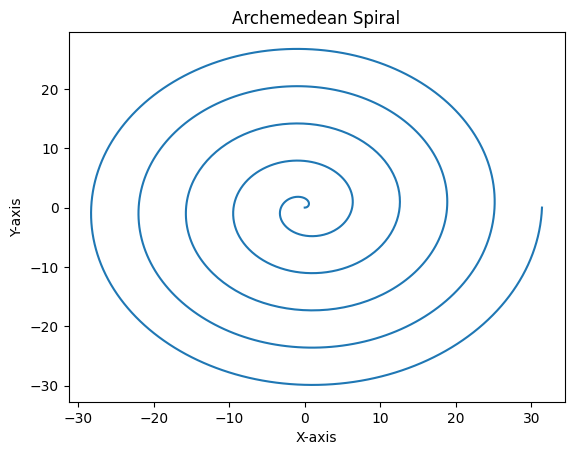

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def achemedean_spiral(t, a, b):
    return [a * t * np.cos(t), a * t * np.sin(t)]

# 매개변수 설정
a = 1
b = 1

# 나선의 각도 범위 지정
theta_range = np.linspace(0, 10 * np.pi, 1000)

# 나선의 좌표 계산
spiral_coordinates = np.array([achemedean_spiral(t, a, b) for t in theta_range])

# 나선 그리기
plt.plot(spiral_coordinates[:, 0], spiral_coordinates[:, 1])
plt.title("Archemedean Spiral")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [9]:
import pandas as pd
df1 = pd.read_csv(r'D:\Analysis\DEBA\NLP\Sentiment_Analysis\eurovoc.tsv', sep='\t')
df2 = pd.read_csv(r'D:\Analysis\DEBA\NLP\Sentiment_Analysis\fulltext.tsv', sep='\t')

In [11]:
df1.head()

,Datum,F,G,S,V
0,2002-12-20,öffentliche Verwaltung|öffentlicher Dienst|Eur...,junger Mensch|Strafrecht|Behinderter|Gesetzgeb...,Steuerwesen|Verteidigung|Verfassung|Tiermedizi...,öffentliche Verwaltung|öffentlicher Dienst|Eur...
1,2003-01-23,öffentliche Verwaltung|öffentlicher Dienst|Ste...,"Land- und Forstwirtschaft, Fischerei|Gesetzgeb...",Geschäftsordnung des Parlaments|Gesetzgebungsv...,öffentliche Verwaltung|öffentlicher Dienst|Ste...
2,2003-02-26,Opferhilfe|Behinderter|Opferhilfe,Opferhilfe|Behinderter|Gesetzgebungsverfahren|...,Opferhilfe|Handel|Industrie|Unternehmen und We...,Opferhilfe|Behinderter|Opferhilfe
3,2003-03-06,Exekutive|Internationale Beziehungen|Exekutive,Wohnungspolitik|soziale Sicherheit|Behinderter...,Strafrecht|Gliedstaat|Öffentliche Finanzen und...,Exekutive|Internationale Beziehungen|Exekutive
4,2003-03-19,NaN,Gliedstaat|Parlamentsdebatte|Verfassung|Wahl|G...,Informatik|Information und Informationsverarbe...,NaN


In [10]:
df2.head()

,Datum,F,G,S,V
0,2002-12-20,parlamentarische|materialien|6/a|xxii.gp|einge...,parlamentarische|materialien|13/a|xxii.gp|eing...,parlamentarische|materialien|7/ae|xxii.gp|eing...,parlamentarische|materialien|6/a|xxii.gp|einge...
1,2003-01-23,parlamentarische|materialien|35/a|xxii.gp|eing...,parlamentarische|materialien|42/ae|xxii.gp|ein...,parlamentarische|materialien|31/a|xxii.gp|eing...,parlamentarische|materialien|35/a|xxii.gp|eing...
2,2003-02-26,parlamentarische|materialien|45/a|xxii|gp|eing...,parlamentarische|materialien|45/a|xxii|gp|eing...,parlamentarische|materialien|45/a|xxii|gp|eing...,parlamentarische|materialien|45/a|xxii|gp|eing...
3,2003-03-06,parlamentarische|materialien|69/a|xxii|gp|eing...,parlamentarische|materialien|63/a|xxii|gp|eing...,parlamentarische|materialien|65/a|xxii|gp|eing...,parlamentarische|materialien|69/a|xxii|gp|eing...
4,2003-03-19,NaN,parlamentarische|materialien|70/a|xxii|gp|eing...,parlamentarische|materialien|71/a|xxii|gp|eing...,NaN
